# Movie Genre Classification
### Predicting the genre of movie from just 1000 or less characters of script

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading dataset
data=pd.read_csv("D:\Projects\Movie Genre Classification\movie_genre_train.csv")

In [3]:
data

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama
...,...,...,...
22574,28161,n in the world to decide what I'm going to do ...,drama
22575,28162,shards. BOJO LAZ! Laz pushes Deke back through...,drama
22576,28163,"OTTIE You've got a thing about Ernie's, haven'...",thriller
22577,28165,....with marked skill and dexterity . LANA wry...,action


## Exploring the dataset and Visualizing

In [4]:
data.columns

Index(['id', 'text', 'genre'], dtype='object')

In [5]:
data.shape

(22579, 3)

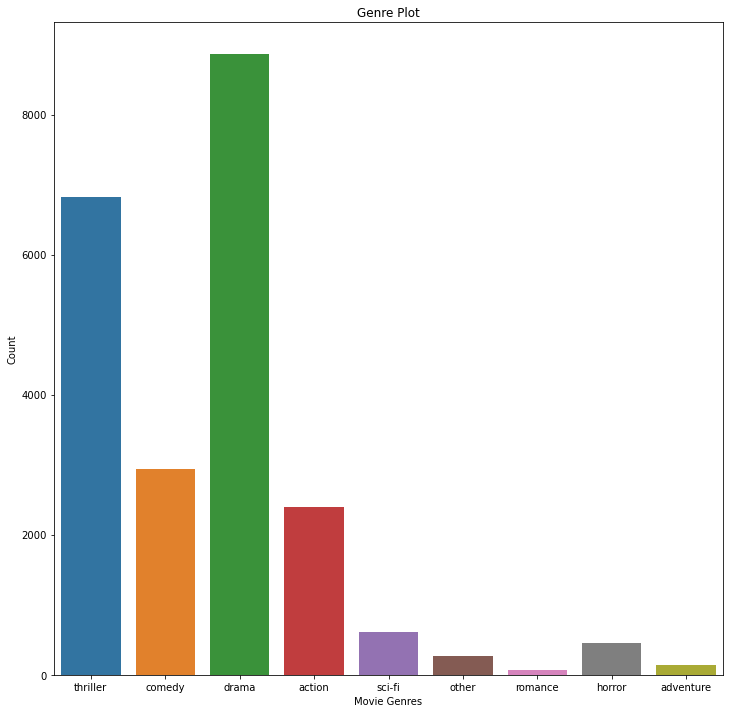

In [6]:
# Visualizing the count of 'genre' column 
plt.figure(figsize=(12,12))
sns.countplot(x='genre', data=data)
plt.xlabel('Movie Genres')
plt.ylabel('Count')
plt.title('Genre Plot')
plt.show()

## Data Cleaning and Preprocessing

In [7]:
# Mapping the genres with values
movie_genre=list(data['genre'].unique())
movie_genre.sort()
movie_genre

['action',
 'adventure',
 'comedy',
 'drama',
 'horror',
 'other',
 'romance',
 'sci-fi',
 'thriller']

In [8]:
mapper={'action':0,'adventure':1,'comedy':2,'drama':3,'horror':4, 'romance':5, 'sci-fi':6, 'thriller':7, 'other':8}
data['genre']=data['genre'].map(mapper)
data.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",7
1,2,"t, summa cum laude and all. And I'm about to l...",2
2,3,"up Come, I have a surprise.... She takes him ...",3
3,4,ded by the two detectives. INT. JEFF'S APARTME...,7
4,5,"nd dismounts, just as the other children reach...",3
5,6,breadth of the bluff. Gabe pulls out his ancie...,7
6,7,uilding. A MAN in pajamas runs out into the ra...,7
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,3
8,10,"Memphis goes back into the garage, Budgy cack...",7
9,11,e reels as the world spins. Sweat pours off hi...,0


In [9]:
# finding NaN values
data.isnull().any()

id       False
text     False
genre    False
dtype: bool

In [10]:
# Removing id column 
data.drop('id', axis=1, inplace=True)
data.head(5)

,text,genre
0,"eady dead, maybe even wishing he was. INT. 2ND...",7
1,"t, summa cum laude and all. And I'm about to l...",2
2,"up Come, I have a surprise.... She takes him ...",3
3,ded by the two detectives. INT. JEFF'S APARTME...,7
4,"nd dismounts, just as the other children reach...",3


### importing essential libraries for NLP

In [11]:
import nltk
import re
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [12]:
# Cleaning the text data 
corpus=[]
ps = PorterStemmer()
sw=stopwords.words('english')

for i in range(0,data.shape[0]):
    
    # removing unwanted special characters
    text= re.sub(pattern="[^a-zA-Z]",repl=" ", string=data['text'][i])
    
    # converting into lower case
    text=text.lower()
    
    # Tokeniztion-splitting our enter sentence into list(each word as token)
    words=text.split()
    
    # removing stopwords
    text_words=[word for word in words if word not in set(sw)]
    
    # Stemming the words
    words=[ps.stem(word) for word in text_words]    
    
    # joining the stemmed words
    text=" ".join(words)
    
    # Creating a corpus
    corpus.append(text)

In [13]:
corpus

['eadi dead mayb even wish int nd floor hallway three night orderli lead liza door orderli white guy open door step room three white guy mid look wild straight jacket jerri liza reach end rope shake head int decrepit hospit room night ball fetal realli head press cement tri sing jerri blue moon blue moon int nd floor hallway three night liza stand lean rail wall orderli sure go know bad orderli okay liza start hall orderli follow orderli got new patient last week want see liza wave hopeless stop chicken wire window end hall look light break jerri somewher orderli look gotta get back work',
 'summa cum laud launch brand new magazin call expos homag miss juli conroy xenia ohio juli grin juli know find excel editor chief ted yellow page juli let finger walk suddenli music chang peopl ted grin ted play song extend hand dare ask danc juli take hand better ted juli begin danc kiss b g charli jimmi feign tear charli sucker happi end hug jimmi hold start rise nelson hous cloud xenia ted v gues

In [14]:
len(corpus)

22579

### Creating wordcloud for different genres

In [18]:
action_words=[]
for i in list(data[data['genre']==0].index):
    action_words.append(corpus[i])
    
thriller_words=[]
for i in list(data[data['genre']==7].index):
    thriller_words.append(corpus[i])

adventure_words=[]
for i in list(data[data['genre']==1].index):
    adventure_words.append(corpus[i])

In [19]:
action=''
thriller=''
adventure=''
for i in range(0,3):
    action+=action_words[i]
    thriller+=thriller_words[i]
    adventure+=adventure_words[i]

Text(0.5, 1.0, "Words which indicate 'ACTION' genre")

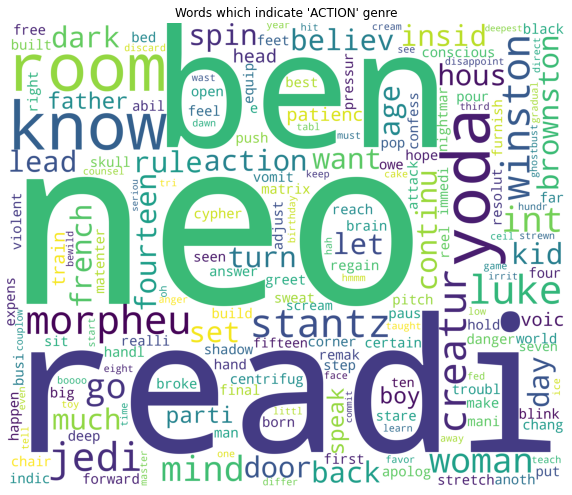

In [25]:
# wordcloud for action genre
from wordcloud import WordCloud
wc=WordCloud(background_color='white', width=3000, height=2500)
action_wc=wc.generate(action)
plt.figure(figsize=(10,10))
plt.imshow(action_wc)
plt.axis('off')
plt.title("Words which indicate 'ACTION' genre")

Text(0.5, 1.0, "Words which indicate 'THRILLER' genre")

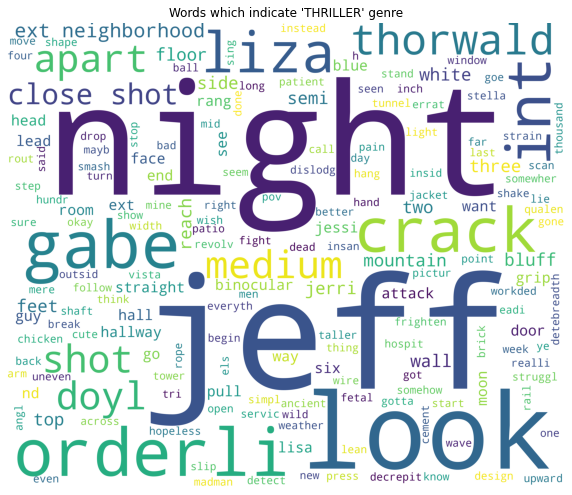

In [26]:
# wordcloud for thriller genre
thriller_wc=wc.generate(thriller)
plt.figure(figsize=(10,10))
plt.imshow(thriller_wc)
plt.axis('off')
plt.title("Words which indicate 'THRILLER' genre")

Text(0.5, 1.0, "Words which indicate 'ADVENTURE' genre")

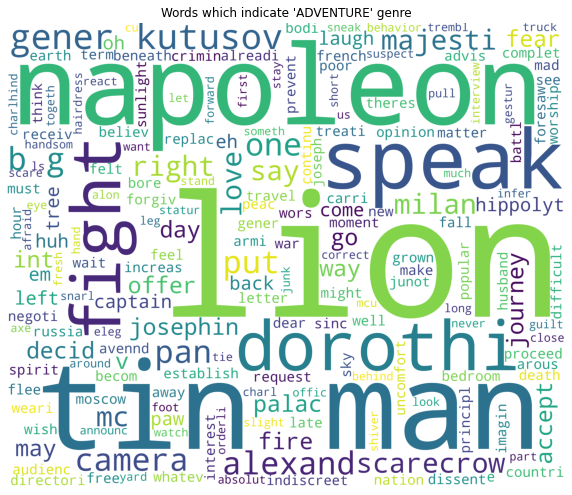

In [27]:
# wordcloud for adventure genre
adventure_wc=wc.generate(adventure)
plt.figure(figsize=(10,10))
plt.imshow(adventure_wc)
plt.axis('off')
plt.title("Words which indicate 'ADVENTURE' genre")

## Vectorization
### Creating Bag of Words model

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=10000, ngram_range=(1,2))
x=cv.fit_transform(corpus).toarray()

In [33]:
y=data['genre'].values
y

array([7, 2, 3, ..., 7, 0, 2], dtype=int64)

In [55]:
joblib.dump(cv, open('cv-transform.pkl', 'wb'))

## Train and Test Splitting

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train.shape,x_test.shape)

(18063, 10000) (4516, 10000)


## Multinomial Naive bayes

In [36]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier=MultinomialNB()
nb_classifier.fit(x_train,y_train)

MultinomialNB()

In [37]:
from sklearn.metrics import *

In [40]:
#predicting the test set
# Checking Accuracy
y_pred=nb_classifier.predict(x_test)
score=accuracy_score(y_test,y_pred)
print("Accuracy scoreis:{}%".format(round(score*100,2)))

Accuracy scoreis:89.57%


In [41]:
# Confusion Matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 450,    0,    8,    6,    1,    0,    0,   11,    0],
       [   2,   41,    0,    1,    0,    0,    0,    1,    0],
       [   7,    0,  517,   18,    2,    0,    4,   11,    0],
       [  42,    1,   38, 1607,   21,    1,   11,  103,    3],
       [   1,    0,    1,    4,   73,    0,    0,    3,    0],
       [   1,    0,    0,    0,    0,   10,    0,    0,    0],
       [   2,    0,    2,    7,    1,    0,  112,    8,    0],
       [  14,    0,   21,   77,   11,    0,   22, 1173,    0],
       [   1,    0,    0,    1,    2,    0,    0,    0,   62]],
      dtype=int64)

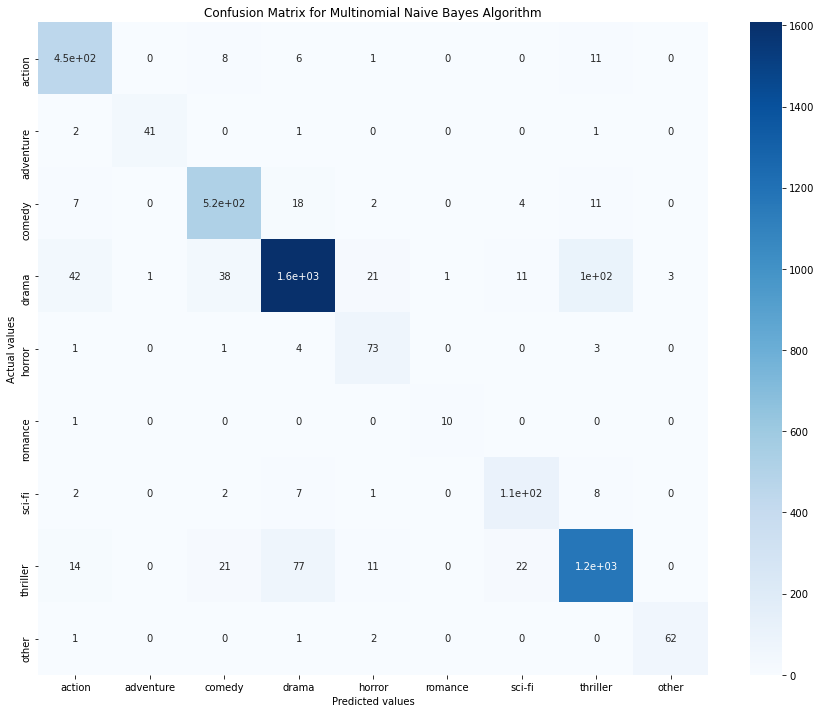

In [45]:

# Plotting the confusion matrix
plt.figure(figsize=(15,12))
axis_labels = ['action', 'adventure', 'comedy', 'drama', 'horror', 'romance', 'sci-fi', 'thriller','other']
sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()

### Hyperparameter tuning the Naive Bayes Classifier to improve model performance


In [49]:
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  classifier = MultinomialNB(alpha=i)
  classifier.fit(x_train, y_train)
  nb_y_pred = classifier.predict(x_test)
  score = accuracy_score(y_test, nb_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 91.34%
Accuracy score for alpha=0.2 is: 91.08%
Accuracy score for alpha=0.3 is: 90.85%
Accuracy score for alpha=0.4 is: 90.59%
Accuracy score for alpha=0.5 is: 90.26%
Accuracy score for alpha=0.6 is: 90.12%
Accuracy score for alpha=0.7 is: 90.04%
Accuracy score for alpha=0.8 is: 89.95%
Accuracy score for alpha=0.9 is: 89.79%
Accuracy score for alpha=1.0 is: 89.57%
--------------------------------------------
The best accuracy is 91.34% with alpha value as 0.1


In [51]:
import joblib

In [53]:
classifier = MultinomialNB(alpha=0.1)
classifier.fit(x_train, y_train)
joblib.dump(classifier, open("mgc-mnb-model.pkl", 'wb'))

# Predicting on Test Dataset

In [56]:
def genre_prediction(sample_script):
  sample_script = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_script)
  sample_script = sample_script.lower()
  sample_script_words = sample_script.split()
  sample_script_words = [word for word in sample_script_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_script = [ps.stem(word) for word in sample_script_words]
  final_script = ' '.join(final_script)

  temp = cv.transform([final_script]).toarray()
  return classifier.predict(temp)[0]

In [62]:
# For generating random integer
from random import randint

In [58]:
# Loading test dataset
test=pd.read_csv("D:\Projects\Movie Genre Classification\movie_genre_test.csv")
test.columns

Index(['id', 'text'], dtype='object')

In [61]:
test.shape

(5589, 1)

In [60]:
test.drop('id',axis=1,inplace=True)
test.head(5)

,text
0,glances at her. BOOK Maybe I ought to learn t...
1,hout breaking stride. Tatiana sees her and can...
2,dead bodies. GEORDI Mitchell... DePaul... LANG...
3,take myself. BRANDON How bad is the other thi...
4,"her body to shield his own. KAY Freeze it, Bug..."


In [66]:
# predicting values
row=randint(0,test.shape[0]-1)
sample_script=test.text[row]

print('script:{}'.format(sample_script))
value=genre_prediction(sample_script)
print('Prediction:{}'.format(list(mapper.keys())[value]))

script:around looking at the exhibits. The first she spies is a scene from THE LITTLE SHOP OF HORRORS with the PLANT having freshly eaten someone. Now we cut to CHINA who is admiring a gentleman knelt down on a staircase. The staircase has many a cobweb on it. CHINA Well what are you supposed to be doing hansom? The bar' in front of the exhibit suddenly drops to the ground. CHINA looks around for anyone who might see her enter. CHINA Let's just take a little look. CASTLE NIGHT CHINA enters the exhibit and finds herself dressed in Victorian if not older era garb. DRACULA Welcome my dear. We thought you were too tired to join us, so we started without you. My apologies.You are going to grace us with your presence.Join us. Camera cuts back and forth between DRACULAS and CHINAS eyes. DRACULA Come to me. CHINA descends down the stairs toward the table. DRACULA You've met my son, Stephan. STEPHAN, standing near DRACULA, takes a bow. DRACULA Please, be seated. CHINA takes a seat at the other 

In [70]:
# predicting values
row=randint(0,test.shape[0]-1)
sample_script=test.text[row]

print('script:{}'.format(sample_script))
value=genre_prediction(sample_script)
print('Prediction:{}'.format(list(mapper.keys())[value]))

script: MOTEL WALKWAY NIGHT STOCKINGED FEET We track on the feet padding down the exterior walkway. INT. MOTEL DUCT NIGHT MOSS Peering along the airduct, both hands up next to one ear awkwardly maneuvering the pole. He lays the far, hooked end over the protruding corner of the document case. He pulls. The pole slides off the case. EXT. INT. 1ST MOTEL ROOM NIGHT CHIGURH He stands at the door of Moss's first room. He eases an ear against it. He steps back. He punches out the lock cylinder with the airgun and kicks in the door, raising the shotgun. A Mexican in a guyabera reclines on one of the two double beds. He is scrabbling for a machine pistol on the nightstand. Chigurh fires three times quickly. The damped blasts have the low resonance of chugs into a bottle. MOSS Head still in the airduct, frozen, listening. EXT. INT. 1ST MOTEL ROOM NIGHT CHIGURH Also frozen, back against the wall outside the room, to one side of the open door. After a beat he steps back into the open doorway level

In [73]:
# predicting values
row=randint(0,test.shape[0]-1)
sample_script=test.text[row]

print('script:{}'.format(sample_script))
value=genre_prediction(sample_script)
print('Prediction:{}'.format(list(mapper.keys())[value]))

script: How do you expect me to protect it? I don't get you people, let alone like you much... HUXLEY You come from a society in which the average l8 year old has witnessed 200,000 acts of simulated violence. In our society the number is closer to four. If someone off the street was to watch the Three Stooge Men and see the Moe person hammer the Curly person, they would weep, John Spartan, weep. Spartan looks at her. What was that? HUXLEY Myself, I'm a bit of an afficanado of the shocking, real and fiction. In fact, I perused many a News Disk of you. That time you wow fully tractor pulled the Santa Monica pier into a heap of rubble in order to snare that team of hit men who... She trails off, as she sees Spartan staring out the window shaking his head, very much alienated from every thing around him. HUXLEY You seem very much alone, John Spartan. Not everything is that different. Perhaps you would like to hear the oldies station. 'Oldies.' The RADIO quickly turns ON and changes station

In [72]:
# predicting values
row=randint(0,test.shape[0]-1)
sample_script=test.text[row]

print('script:{}'.format(sample_script))
value=genre_prediction(sample_script)
print('Prediction:{}'.format(list(mapper.keys())[value]))

script:en off the night stand. Cindy places it back on the nightstand. Cindy turns to climb into bed when she hears the picture fall again. This time the frame breaks, revealing a key hidden in the frame. Cindy examines the key. She gets an idea. Cindy retrieves the chest she found in the secret study form beneath her bed. She places the key in the hole and turns it. The chest opens. Cindy finds several items. Pictures of Carolyn. A diary. An old fashioned dildo. The pendant worn by Carolyn in the photos. Cindy walks to the mirror, slowly placing the pendant around her neck. She looks up into the mirror. Her eyes have a strange look. She slowly turns and looks at the bedroom door. DISSOLVE TO INT. KITCHEN LATER THAT NIGHT The refrigerator door opens. We see the Professor looking for a snack. He grabs an apple. REVEAL Cindy wearing a sexy red dress ala Michelle Pfeiffer. CINDY Hello, Professor. He smiles. PROFESSOR Hello, Cindy... She shakes her head. CINDY Forbidden fruit. She takes th